In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("abalone.csv")

In [2]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

Dataset shape: (4177, 9)

Columns: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

First 5 rows:
   Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [5]:
print("\n--- EDA: Summary statistics ---")
print(df.describe(include='all'))

print("\n--- EDA: Missing values per column ---")
print(df.isnull().sum())


--- EDA: Summary statistics ---
         Sex       Length     Diameter       Height  Whole weight  \
count   4177  4177.000000  4177.000000  4177.000000   4177.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1528          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407881     0.139516      0.828742   
std      NaN     0.120093     0.099240     0.041827      0.490389   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.441500   
50%      NaN     0.545000     0.425000     0.140000      0.799500   
75%      NaN     0.615000     0.480000     0.165000      1.153000   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        Shucked weight  Viscera weight  Shell weight        Rings  
count      4177.000000     4177.000000   4177.000000  4177.000000  
un

In [6]:
print("\nRings value counts (sample):")
print(df['Rings'].value_counts().sort_index().head(20))



Rings value counts (sample):
Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
Name: count, dtype: int64


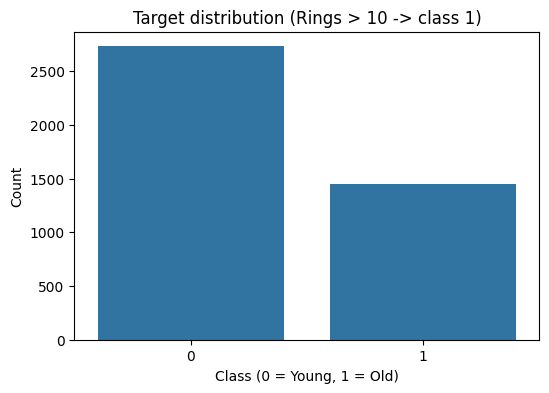

In [7]:
RINGS_THRESHOLD = 10
plt.figure(figsize=(6,4))
sns.countplot(x=(df['Rings'] > RINGS_THRESHOLD).astype(int))
plt.title(f"Target distribution (Rings > {RINGS_THRESHOLD} -> class 1)")
plt.xlabel("Class (0 = Young, 1 = Old)")
plt.ylabel("Count")
plt.show()

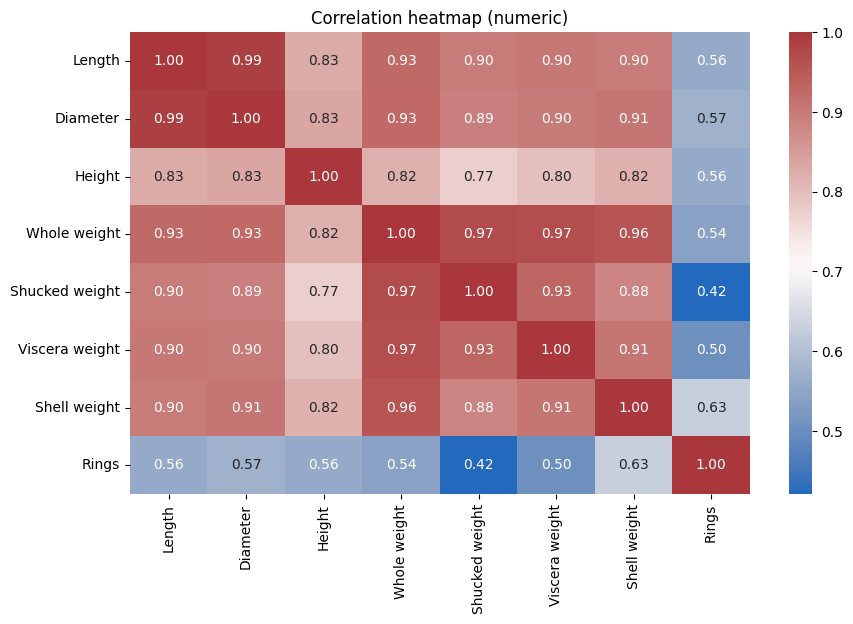

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation heatmap (numeric)")
plt.show()

In [9]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

In [10]:
df['Target'] = (df['Rings'] > RINGS_THRESHOLD).astype(int)

In [11]:
feature_cols = ['Sex_encoded', 'Length', 'Diameter', 'Height',
                'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
X = df[feature_cols].copy()
y = df['Target'].copy()


In [12]:
print("\nFeature columns used:", feature_cols)
print("Class balance:\n", y.value_counts())


Feature columns used: ['Sex_encoded', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
Class balance:
 Target
0    2730
1    1447
Name: count, dtype: int64


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 3341, Test size: 836


In [15]:
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print("\n--- Logistic Regression (raw features) ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))


--- Logistic Regression (raw features) ---
Accuracy: 0.757177033492823
Confusion Matrix:
 [[481  65]
 [138 152]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7771    0.8810    0.8258       546
           1     0.7005    0.5241    0.5996       290

    accuracy                         0.7572       836
   macro avg     0.7388    0.7025    0.7127       836
weighted avg     0.7505    0.7572    0.7473       836



In [17]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

In [18]:
explained_var = pca_full.explained_variance_ratio_
print("\n--- PCA explained variance ratio ---")
for i, ev in enumerate(explained_var, start=1):
    print(f"PC{i}: {ev:.6f}")


--- PCA explained variance ratio ---
PC1: 0.794530
PC2: 0.125054
PC3: 0.034823
PC4: 0.020899
PC5: 0.014229
PC6: 0.008042
PC7: 0.001591
PC8: 0.000832


In [19]:
cumvar = np.cumsum(explained_var)
print("\nCumulative variance by PC:", cumvar)


Cumulative variance by PC: [0.7945299  0.91958372 0.9544069  0.97530572 0.98953509 0.99757707
 0.99916792 1.        ]


In [21]:
pca_95 = PCA(n_components=0.95, random_state=42)
X_pca_95 = pca_95.fit_transform(X_scaled)
n_components_kept = pca_95.n_components_
print(f"\nNumber of PCA components to retain 95% variance: {n_components_kept}")


Number of PCA components to retain 95% variance: 3


In [22]:
X_train_pca = pca_95.transform(X_train)
X_test_pca = pca_95.transform(X_test)

In [23]:
log_pca = LogisticRegression(max_iter=2000, random_state=42)
log_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=2000, random_state=42)

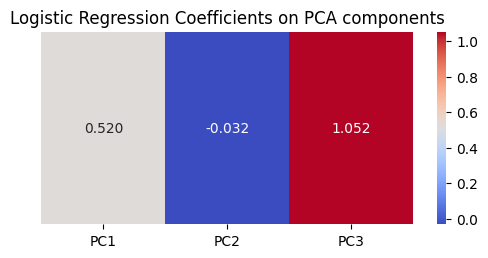

In [24]:
coeffs = log_pca.coef_[0]  # shape (n_components,)
pc_labels = [f"PC{i+1}" for i in range(len(coeffs))]

plt.figure(figsize=(max(6, len(coeffs)*0.5), 2.5))
sns.heatmap([coeffs], annot=True, fmt=".3f", cmap="coolwarm", xticklabels=pc_labels)
plt.title("Logistic Regression Coefficients on PCA components")
plt.yticks([], [])
plt.show()

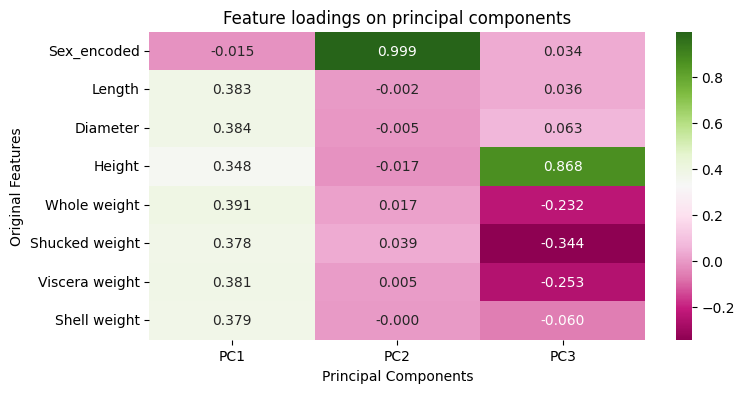

In [25]:
loadings = pca_95.components_.T  # shape (n_features, n_components)
loading_df = pd.DataFrame(loadings, index=feature_cols, columns=pc_labels)

plt.figure(figsize=(8, max(4, len(feature_cols)*0.4)))
sns.heatmap(loading_df, annot=True, fmt=".3f", cmap="PiYG")
plt.title("Feature loadings on principal components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()


In [26]:
y_pred_log_pca = log_pca.predict(X_test_pca)

In [28]:
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_clf.predict(X_test_pca)

In [29]:
print("\n--- Logistic Regression (PCA features) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_log_pca, digits=4))


--- Logistic Regression (PCA features) ---
Accuracy: 0.7320574162679426
Confusion Matrix:
 [[466  80]
 [144 146]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7639    0.8535    0.8062       546
           1     0.6460    0.5034    0.5659       290

    accuracy                         0.7321       836
   macro avg     0.7050    0.6785    0.6861       836
weighted avg     0.7230    0.7321    0.7229       836



In [30]:
print("\n--- SVM (PCA features) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_pca, digits=4))


--- SVM (PCA features) ---
Accuracy: 0.7308612440191388
Confusion Matrix:
 [[464  82]
 [143 147]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7644    0.8498    0.8049       546
           1     0.6419    0.5069    0.5665       290

    accuracy                         0.7309       836
   macro avg     0.7032    0.6784    0.6857       836
weighted avg     0.7219    0.7309    0.7222       836



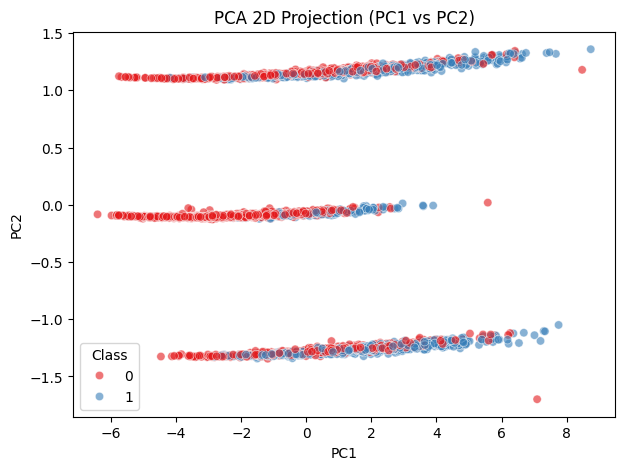

In [31]:
if pca_95.n_components_ >= 2:
    X_pca_2 = PCA(n_components=2).fit_transform(X_scaled)
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=y, alpha=0.6, palette="Set1")
    plt.title("PCA 2D Projection (PC1 vs PC2)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Class")
    plt.show()